<a href="https://colab.research.google.com/github/sudhathangaraj99/KMeans-Clustering-Project/blob/main/KMeans_Clustering_from_Scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`KMeans Clustering `**

In [14]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


**1.DATA GENERATION**

*   500 data Points
*   easyEach point has 2 features (x,y) easy to draw on graph




In [ ]:
np.random.seed(42)

X, _ = make_blobs(
    n_samples = 500,
    centers = 3,
    n_features = 2,
    cluster_std = 1.2,
    shuffle = True
)

2.**K-MEANS FROM SCRATCH(NUMPY ONLY)**


  KMeans does 4 actions repeatedly:

*   Pick K random centers
*   Assign each point to the nearest center
*   Move the centers to the middle of their points
*   Repear until nothing changes





In [6]:
class KMeans:
  def __init__(self, k, max_iters=100):
    self.k = k
    self.max_iters = max_iters

  def fit(self, X):
    random_ini = np.random.choice(len(X), self.k, replace=False)  #Random initilization of centroids
    self.centroids = X[random_ini]


    for _ in range(self.max_iters):
      distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2) #Assignment step
      self.labels = np.argmin(distances, axis=1)
      new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range (self.k)])  #update te step
      if np.allclose(self.centroids, new_centroids):  #convergence check
        break
      self.centroids = new_centroids

    return self
  def compute_wss(self, X): #computing WSS Using Elbow Method
    wss=0
    for i in range(self.k):
      cluster_points = X[self.labels == i]
      wss += np.sum((cluster_points - self.centroids[i] ** 2))
    return wss



**3. ELBOW METHOD & SILHOUETTE ANALYSIS**

In [7]:
wss_values =[]
silhouette_values = []
K_range = range(2,11)

for k in K_range:
  model = KMeans(k)
  model.fit(X)

  wss = model.compute_wss(X)
  silhouette = silhouette_score(X, model.labels)

  wss_values.append(wss)
  silhouette_values.append(silhouette)

  print(f"K={k},  WSS={wss:.2f}, Silhouette={silhouette:.4f}")


K=2,  WSS=-25717.94, Silhouette=0.6867
K=3,  WSS=-34182.37, Silhouette=0.8123
K=4,  WSS=-34340.61, Silhouette=0.6409
K=5,  WSS=-34438.36, Silhouette=0.6573
K=6,  WSS=-34575.31, Silhouette=0.4688
K=7,  WSS=-34777.65, Silhouette=0.3542
K=8,  WSS=-34764.74, Silhouette=0.3181
K=9,  WSS=-34912.61, Silhouette=0.3300
K=10,  WSS=-34908.95, Silhouette=0.3233


**4. OPTIMAL K SELECTION**

In [9]:
optimal_k = K_range[np.argmax(silhouette_values)]
print("\nOptimal k based on Silhouette Score:",optimal_k)


Optimal k based on Silhouette Score: 3


**5. FINAL CLUSTERING WITH OPTIMAL K**

In [10]:
final_model = KMeans(optimal_k)
final_model.fit(X)

**6. VISUALIZATION**

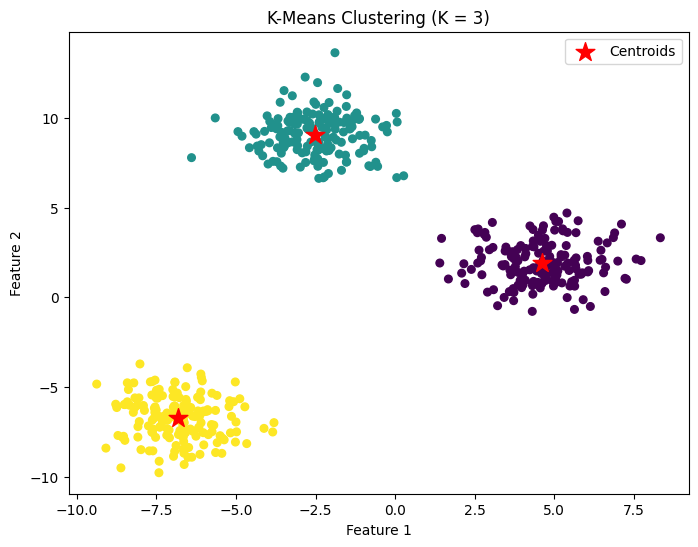

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0], X[:, 1],
    c=final_model.labels,
    cmap='viridis',
    s=30
)

plt.scatter(
    final_model.centroids[:, 0],
    final_model.centroids[:, 1],
    color='red',
    marker='*',
    s=200,
    label='Centroids'
)

plt.title(f"K-Means Clustering (K = {optimal_k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



**7. ELBOW & SILHOUETTE PLOTS**

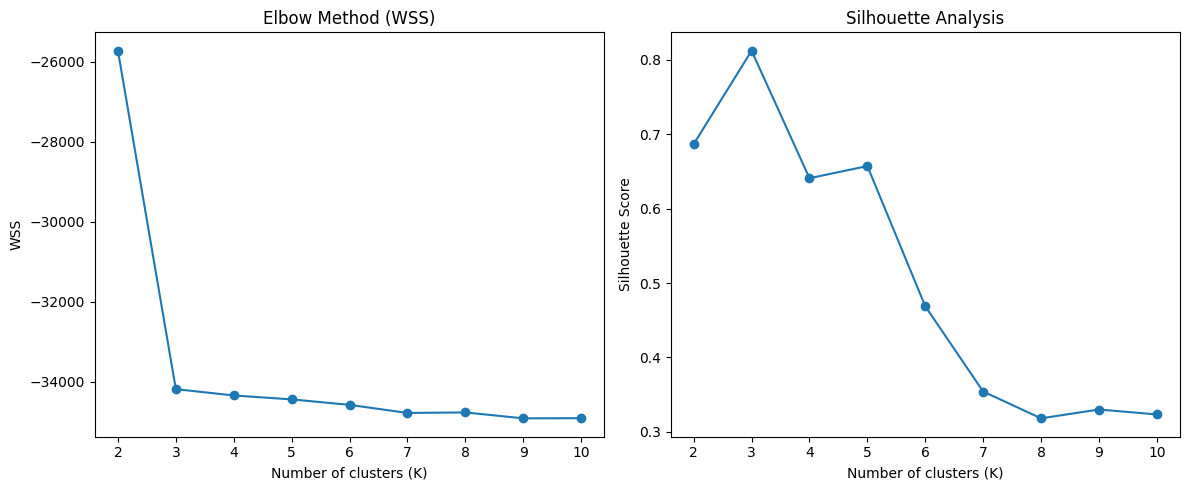

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(K_range, wss_values, marker='o')
plt.title("Elbow Method (WSS)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WSS")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_values,marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()